# Analysis
## Contents
- Heatmap of correlation
- PCA
    - scatter plot
    - barplots of loadings

In [1]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA

from tools.preference import gene_micg, kwarg_savefig

In [2]:
class Config(NamedTuple):
    data: pd.core.frame.DataFrame = pd.read_pickle(
        "../data/gse79416.pkl"
    ).loc[:, gene_micg]
    meta: pd.core.frame.DataFrame = pd.read_pickle(
        "../data/gse79416_label.pkl"
    )
    container: str = "../out"
    kwarg_savefig: dict = kwarg_savefig
    save_file: bool = False
        
conf = Config(save_file=True)

---
## Heatmap

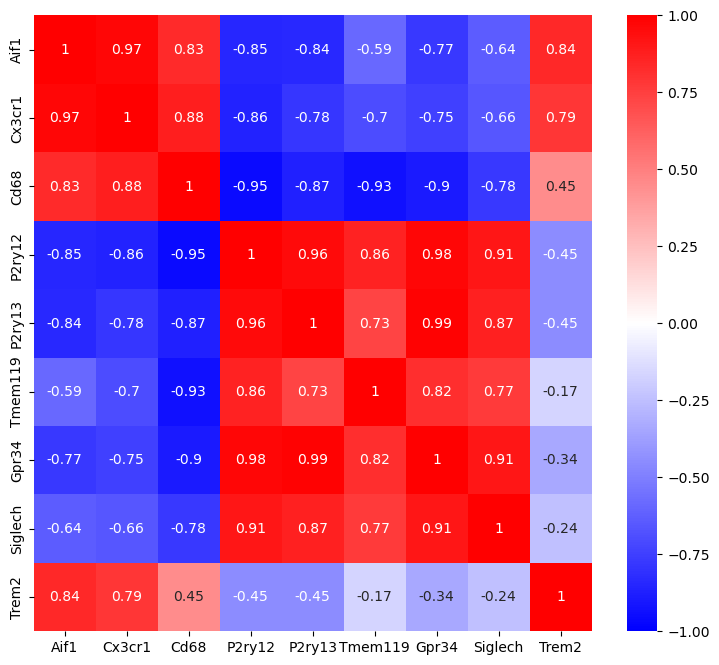

In [3]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(conf.data.corr(), cmap="bwr", vmax=1, vmin=-1, annot=True)

ax.set(xlabel="", ylabel="")

if conf.save_file:
    plt.savefig(f"{conf.container}/microglia_corr.png", **conf.kwarg_savefig)

---
## PCA

In [4]:
model_pca = PCA(random_state=0)

df_pca = pd.DataFrame(
    model_pca.fit_transform(conf.data),
    index = conf.data.index,
    columns = [f"PC{i+1}" for i in range(min(conf.data.shape))]
)

contribution = model_pca.explained_variance_ratio_ * 100

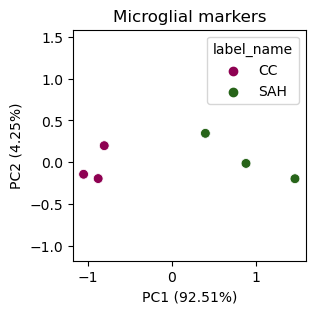

In [5]:
fig, ax = plt.subplots(figsize=(3, 3))

sns.scatterplot(
    x=df_pca.PC1, y=df_pca.PC2,
    hue=conf.meta.label_name,
    palette=[
        plt.cm.PiYG(i/1) for i, v in enumerate(
            conf.meta.label_name.unique()
        )
    ],
    s=50
)

ax.set(
    xlabel=f"PC1 ({contribution[0].round(2)}%)",
    ylabel=f"PC2 ({contribution[1].round(2)}%)",
    title="Microglial markers"
)

ax.set_ylim(ax.get_xlim());

if conf.save_file:
    plt.savefig(f"{conf.container}/microglia_pca.png", **conf.kwarg_savefig)

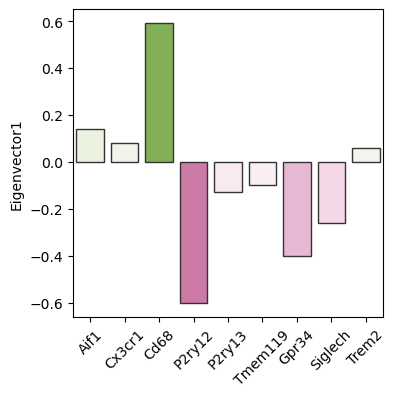

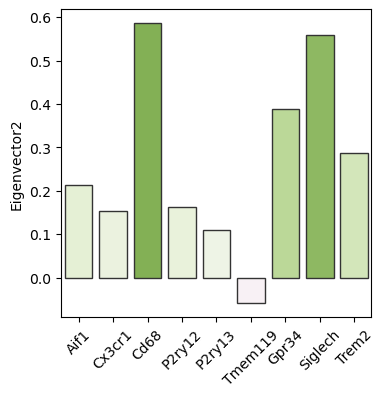

In [6]:
for i, loading in enumerate(model_pca.components_[:2]):
    
    fig, ax = plt.subplots(figsize=(4, 4))

    sns.barplot(
        x=conf.data.columns, y=loading, dodge=False,
        palette=[
            plt.cm.PiYG(np.floor((v + 1) * 50)/100) for v in loading
        ],
        edgecolor=".2"
    )

    plt.xticks(rotation=45)

    ax.set(xlabel="", ylabel=f"Eigenvector{i + 1}");
    
    if conf.save_file:
        plt.savefig(f"{conf.container}/microglia_pc{i + 1}.png", **conf.kwarg_savefig)